In [6]:
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt

In [17]:
rand = pd.read_csv('logs/default/lr0.0050_bs64_cp30_a2.00_e1_r0_n100_f0.03/rand_rr0.10_dr0.75_lr0.005_bs64_cp30_a2.00_e1_r0_n100_f0.03_p6.csv', skiprows=range(32))
powd6 = pd.read_csv('logs/default/lr0.0050_bs64_cp30_a2.00_e1_r0_n100_f0.03/pow-d_rr0.10_dr0.75_lr0.005_bs64_cp30_a2.00_e1_r0_n100_f0.03_p6.csv', skiprows=range(32))
powd9 = pd.read_csv('logs/default/lr0.0050_bs64_cp30_a2.00_e1_r0_n100_f0.03/pow-d_rr0.10_dr0.75_lr0.005_bs64_cp30_a2.00_e1_r0_n100_f0.03_p9.csv', skiprows=range(32))
powd15 = pd.read_csv('logs/default/lr0.0050_bs64_cp30_a2.00_e1_r0_n100_f0.03/pow-d_rr0.10_dr0.75_lr0.005_bs64_cp30_a2.00_e1_r0_n100_f0.03_p15.csv', skiprows=range(32))
rand.head()

,Epoch,itr,loss,trainloss,avg:Loss,Prec@1,avg:Prec@1,val,trainval,updtime,comptime,seltime,entime
0,0,0,2.2992,-1.0,-1,4.688,-1,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
1,0,0,2.2992,-1.0,-1,4.688,-1,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
2,1,0,2.3037,-1.0,-1,4.688,-1,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
3,1,0,2.3037,-1.0,-1,4.688,-1,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
4,2,0,2.3328,-1.0,-1,7.812,-1,-1.0,-1.0,-1.0,-1.0,-1.0,NaN


In [18]:
rand[rand['itr'] == -1].head()
# val -> test accuracry
# trainloss -> training loss

,Epoch,itr,loss,trainloss,avg:Loss,Prec@1,avg:Prec@1,val,trainval,updtime,comptime,seltime,entime
180,0,-1,2.2157,2.2144,-1,-1.0,-1,25.0498,2.2139,0.0992,0.0,0.0002,0.0994
361,1,-1,2.1440,2.1417,-1,-1.0,-1,29.3292,2.1409,0.1021,0.0,0.0001,0.1023
542,2,-1,2.0414,2.0391,-1,-1.0,-1,42.7349,2.0380,0.1016,0.0,0.0002,0.1018
723,3,-1,1.9429,1.9399,-1,-1.0,-1,51.5525,1.9389,0.1065,0.0,0.0002,0.1067
904,4,-1,1.8614,1.8579,-1,-1.0,-1,50.1990,1.8567,0.1115,0.0,0.0001,0.1116


In [20]:
metric = 'val'
# metric = 'trainloss'
rand_test_acc = rand[rand['itr'] == -1][['Epoch', metric]].sort_values(['Epoch'])[metric].tolist()
powd6_test_acc = powd6[powd6['itr'] == -1][['Epoch', metric]].sort_values(['Epoch'])[metric].tolist()
powd9_test_acc = powd9[powd9['itr'] == -1][['Epoch', metric]].sort_values(['Epoch'])[metric].tolist()
powd15_test_acc = powd15[powd15['itr'] == -1][['Epoch', metric]].sort_values(['Epoch'])[metric].tolist()

Text(0.5, 1.0, 'K=100, $\\alpha$=2, C=0.03')

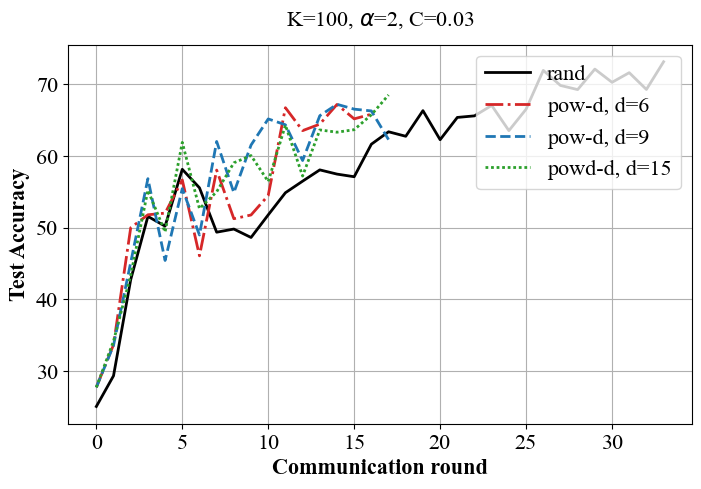

In [22]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## plot settings
# color maps reference: https://matplotlib.org/stable/users/explain/colors/colormaps.html#qualitative
# line styles reference: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
c_t = cm.get_cmap('tab10')
ftsize = 16
params = {'legend.fontsize': ftsize,
         'axes.labelsize': ftsize,
         'axes.titlesize':ftsize,
         'xtick.labelsize':ftsize,
         'ytick.labelsize':ftsize}
plt.rcParams.update(params)
lw = 2
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['axes.labelweight'] = 'bold'
# plt.figure(figsize=(16,14.5))
plt.subplots_adjust(right=1.1, top=0.9)
rcParams['axes.titlepad'] = 14

## experiment configurations
# key=experiment_id, value=(algo, powd, color, linestyle)
client_selection_type = {
    'rand': ('rand', 1, rand_test_acc, 'k', '-'),
    'powd6': ('pow-d', 6, powd6_test_acc, c_t(3), '-.'),
    'powd9': ('pow-d', 9, powd9_test_acc, c_t(0), '--'),
    'powd15': ('powd-d', 15, powd15_test_acc, c_t(2), (0, (1, 1)))
}

## run experiments
for key in client_selection_type.keys():
    # set seed for reproducibility
    np.random.seed(12345)

    # fetch configuration
    algo, powd, vals, color, lstyle = client_selection_type[key]
    
    # plot global loss for each configuration
    if algo =='rand' or algo =='adapow-d':
        p_label = algo
    else:
        p_label = algo+', d={}'.format(powd)
    plt.plot(vals, lw=lw, color=color, ls = lstyle, label=p_label)

# update plot settings
plt.ylabel('Test Accuracy')
plt.xlabel('Communication round')
plt.xticks()
plt.yticks()
plt.legend(loc=1)
# plt.legend(loc=4)
plt.grid()
plt.title('K=100, $\\alpha$=2, C=0.03')
# plt.show()
# plt.savefig(f'synthetic_m={sample_ratio}.pdf', bbox_inches='tight')